In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("dataset_NN.csv")
df["class"] = df["class"] - 1
df.head()

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,0
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,0
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,0
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,0
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,0


In [40]:
df = df.sample(frac=1)
df.head()

,att1,att2,att3,att4,att5,att6,class
1020,0.0,2.0,0.0,180.092861,2.037025,9605.468984,5
1720,2.0,0.0,2.0,128.626861,1.343888,1933.915092,8
485,0.0,3.0,1.0,197.592861,2.010033,11201.396538,2
1441,0.0,2.0,0.0,165.982861,1.778655,6568.861082,7
923,0.0,3.0,1.0,157.052861,1.711605,6720.015256,4


In [41]:
df_minmax = (df - df.min())/(df.max() - df.min())
df_minmax.head()

,att1,att2,att3,att4,att5,att6,class
1020,0.0,0.333333,0.0,0.611560,0.631416,0.506174,0.555556
1720,1.0,0.000000,0.4,0.220979,0.141808,0.030645,0.888889
485,0.0,0.500000,0.2,0.744369,0.612349,0.605099,0.222222
1441,0.0,0.333333,0.0,0.504478,0.448912,0.317947,0.777778
923,0.0,0.500000,0.2,0.436707,0.401550,0.327316,0.444444


In [42]:
df_train_norm = df_minmax[0:1400]
df_test_norm = df_minmax[1400:]

df_train = df[0:1400]
df_test = df[1400:]

In [43]:
x_train = np.array(df_train.drop(columns="class"))
y_train = np.array(df_train["class"])

x_train_norm = np.array(df_train_norm.drop(columns="class"))
y_train_norm = np.array(df_train["class"])

x_test = np.array(df_test.drop(columns="class"))
y_test = np.array(df_test["class"])

x_test_norm = np.array(df_test_norm.drop(columns="class"))
y_test_norm = np.array(df_test["class"])

In [44]:
y_train

array([5, 8, 2, ..., 2, 8, 5], dtype=int64)

In [45]:
x_train = x_train.T
x_test = x_test.T

x_train_norm = x_train_norm.T
x_test_norm = x_test_norm.T

In [46]:
input_size = 6
hl_1 = 100
hl_2 = 50
output_size = 10

# ANN Function

In [47]:
def init_params_1():
  W1 = np.random.rand(hl_1, input_size) - 0.5
  b1 = np.zeros(shape=(hl_1, 1))
  W2 = np.random.rand(output_size, hl_1) - 0.5
  b2 = np.zeros(shape=(output_size, 1))
  return W1, b1, W2, b2;

In [48]:
def init_params_2():
  W1 = np.random.rand(hl_1, input_size)-0.5
  b1 = np.zeros(shape=(hl_1, 1))
  W2 = np.random.rand(hl_2, hl_1)-0.5
  b2 = np.zeros(shape=(hl_2, 1))
  W3 = np.random.rand(output_size, hl_2)-0.5
  b3 = np.zeros(shape=(output_size, 1))
  return W1, b1, W2, b2, W3, b3

In [49]:
def relu(X):
  return np.maximum(X, 0)

In [50]:
def softmax(X):
  fx = np.exp(X)
  return fx / fx.sum(axis=0)

In [51]:
def diff_relu(X):
  return X > 0

In [52]:
def tanh(X):
  fx = np.tanh(X)
  return fx

In [53]:
def diff_tanh(X):
  return 1 - (tanh(X)*tanh(X))

In [54]:
def one_hot(Y):
  one_hot_y = np.zeros((Y.size, 10))
  one_hot_y[np.arange(Y.size), Y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

In [55]:
def softmaxCost(A, Y):    
  loss_sum = 0
  for i in range(Y.shape[0]):
    loss_sum += np.log(A[Y[i]][i])*-1
  return loss_sum/Y.shape[0]

In [56]:
def forward_prop_1(W1, b1, W2, b2, X, func):
  Z1 = W1.dot(X) + b1
  if(func == "tanh"):
    A1 = tanh(Z1)
  elif(func == "relu"):
    A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [57]:
def forward_prop_2(W1, b1, W2, b2, W3, b3, X, func1, func2):
  Z1 = W1.dot(X) + b1
  if(func1 == "tanh"):
    A1 = tanh(Z1)
  elif(func1 == "relu"):
    A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  if(func2 == "tanh"):
    A2 = tanh(Z2)
  elif(func2 == "relu"):
    A2 = relu(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

In [58]:
def backward_prop_1(Z1, A1, Z2, A2, W2, X, Y, func):
  div = Y.size
  one_hot_y = one_hot(Y)
  dZ2 = A2 - one_hot_y
  dW2 = (1/div)*dZ2.dot(A1.T)
  db2 = (1/div)*np.sum(dZ2)
  if(func == "tanh"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  elif(func == "relu"):
    dZ1 = W2.T.dot(dZ2) * diff_relu(Z1)
  dW1 = (1/div)*dZ1.dot(X.T)
  db1 = (1/div)*np.sum(dZ1)
  return dW1, db1, dW2, db2

In [59]:
def backward_prop_2(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y, func1, func2):
  div = Y.size
  one_hot_y = one_hot(Y)
  dZ3 = A3 - one_hot_y
  dW3 = (1/div)*dZ3.dot(A2.T)
  db3 = (1/div)*np.sum(dZ3)
  if(func2 == "tanh"):
    dZ2 = W3.T.dot(dZ3) * diff_tanh(Z2)
  elif(func2 == "relu"):
    dZ2 = W3.T.dot(dZ3) * diff_tanh(Z2)
  dW2 = (1/div)*dZ2.dot(A1.T)
  db2 = (1/div)*np.sum(dZ2)
  if(func1 == "tanh"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  elif(func1 == "relu"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  dW1 = (1/div)*dZ1.dot(X.T)
  db1 = (1/div)*np.sum(dZ1)
  return dW1, db1, dW2, db2, dW3, db3

In [60]:
def update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
  W1 = W1 - lr*dW1
  W2 = W2 - lr*dW2

  b1 = b1 - lr*db1
  b2 = b2 - lr*db2
  return W1, b1, W2, b2

In [61]:
def update_params_2(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr):
  W1 = W1 - lr*dW1
  W2 = W2 - lr*dW2
  W3 = W3 - lr*dW3

  b1 = b1 - lr*db1
  b2 = b2 - lr*db2
  b3 = b3 - lr*db3
  return W1, b1, W2, b2, W3, b3

In [62]:
def predict(Y):
  return np.argmax(Y, 0)

In [63]:
def accuracy(y_actual, y_pred):
  return np.sum(y_pred == y_actual)/y_actual.shape[0]

# Neural Network with One Hidden Layer

In [64]:
def nn_batch_descent_1(X, Y, iters, lr, batch_size):
  accs = []
  losses = []
  epoch = 0
  W1, b1, W2, b2 = init_params_1()
  batch_no = X.shape[1]/batch_size
  for i in range(iters+1):
    cur_pos = 0
    epoch_cost = 0
    while(cur_pos+batch_size < X.shape[1]):
      epoch += 1
      X_temp = X[:, cur_pos:cur_pos+batch_size]
      Y_temp = Y[cur_pos:cur_pos+batch_size]
      cur_pos += batch_size
      Z1, A1, Z2, A2 = forward_prop_1(W1, b1, W2, b2, X_temp, "relu")
      dW1, db1, dW2, db2 = backward_prop_1(Z1, A1, Z2, A2, W2, X_temp, Y_temp, "relu")
      W1, b1, W2, b2 = update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
    Z1, A1, Z2, A2 = forward_prop_1(W1, b1, W2, b2, X, "relu")
    if(i%50 == 0):
      acc = accuracy(Y, predict(A2))
      print("Accuracy after epoch", i, " = ", acc)
      loss = softmaxCost(A2, Y)
      print("Cost after epoch", i, " = ", softmaxCost(A2, Y))
      accs.append(acc)
      losses.append(loss)

  return W1, b1, W2, b2, accs, losses


In [65]:
#Mini-batch gradient descent applied on 1 hidden layer
W1, b1, W2, b2, accs1, losses1 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.1, 100)

Accuracy after epoch 0  =  0.26142857142857145
Cost after epoch 0  =  2.1178073733288003
Accuracy after epoch 50  =  0.6978571428571428
Cost after epoch 50  =  0.8825619796493884
Accuracy after epoch 100  =  0.7085714285714285
Cost after epoch 100  =  0.7365522518675189
Accuracy after epoch 150  =  0.7221428571428572
Cost after epoch 150  =  0.6884776010278364
Accuracy after epoch 200  =  0.73
Cost after epoch 200  =  0.6607525280816315
Accuracy after epoch 250  =  0.74
Cost after epoch 250  =  0.6406737704459935
Accuracy after epoch 300  =  0.7464285714285714
Cost after epoch 300  =  0.622883703274016
Accuracy after epoch 350  =  0.7528571428571429
Cost after epoch 350  =  0.6095103861361578
Accuracy after epoch 400  =  0.7607142857142857
Cost after epoch 400  =  0.5987921230994024
Accuracy after epoch 450  =  0.7621428571428571
Cost after epoch 450  =  0.5901731075010044
Accuracy after epoch 500  =  0.765
Cost after epoch 500  =  0.5828141624455833
Accuracy after epoch 550  =  0.7635

In [66]:
W1, b1, W2, b2, accs102, losses102 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.2, 100)

Accuracy after epoch 0  =  0.20285714285714285
Cost after epoch 0  =  2.1026670922789688
Accuracy after epoch 50  =  0.6978571428571428
Cost after epoch 50  =  0.7331596286756835
Accuracy after epoch 100  =  0.7264285714285714
Cost after epoch 100  =  0.6601591855463254
Accuracy after epoch 150  =  0.7414285714285714
Cost after epoch 150  =  0.6274390993699709
Accuracy after epoch 200  =  0.7492857142857143
Cost after epoch 200  =  0.6056377262263638
Accuracy after epoch 250  =  0.7557142857142857
Cost after epoch 250  =  0.5892632818474548
Accuracy after epoch 300  =  0.755
Cost after epoch 300  =  0.5799315119186382
Accuracy after epoch 350  =  0.76
Cost after epoch 350  =  0.5756285659202154
Accuracy after epoch 400  =  0.7614285714285715
Cost after epoch 400  =  0.5635366154045954
Accuracy after epoch 450  =  0.7635714285714286
Cost after epoch 450  =  0.5577151949725309
Accuracy after epoch 500  =  0.7635714285714286
Cost after epoch 500  =  0.5552371604887291
Accuracy after epoch

In [67]:
W1, b1, W2, b2, accs105, losses105 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy after epoch 0  =  0.10071428571428571
Cost after epoch 0  =  2.307770745953278
Accuracy after epoch 50  =  0.6785714285714286
Cost after epoch 50  =  1.2303964601444521
Accuracy after epoch 100  =  0.6971428571428572
Cost after epoch 100  =  0.9536522374266958
Accuracy after epoch 150  =  0.7078571428571429
Cost after epoch 150  =  0.8273496605473567
Accuracy after epoch 200  =  0.715
Cost after epoch 200  =  0.7617424110578757
Accuracy after epoch 250  =  0.7185714285714285
Cost after epoch 250  =  0.7234638748524308
Accuracy after epoch 300  =  0.7207142857142858
Cost after epoch 300  =  0.6988065220408184
Accuracy after epoch 350  =  0.7235714285714285
Cost after epoch 350  =  0.6812557776825222
Accuracy after epoch 400  =  0.7285714285714285
Cost after epoch 400  =  0.6678361212649547
Accuracy after epoch 450  =  0.7364285714285714
Cost after epoch 450  =  0.6568732934189019
Accuracy after epoch 500  =  0.7392857142857143
Cost after epoch 500  =  0.6476631991706714
Accurac

In [68]:
Z1, A1, Z2, A2 = forward_prop_1(W1, b1, W2, b2, x_train_norm, "relu")
accuracy_train_1 = accuracy(y_train, predict(A2))
loss_train_1 = softmaxCost(A2, y_train)

Z1, Z2, Z2, A2 = forward_prop_1(W1, b1, W2, b2, x_test_norm, "relu")
accuracy_test_1 = accuracy(y_test, predict(A2))
loss_test_1 = softmaxCost(A2, y_test)

print("For Neural Network with 1 Hidden Layer")
print("Accuracy for training = ", accuracy_train_1)
print("Accuracy for test = ", accuracy_test_1)

print("Loss for training = ", loss_train_1)
print("Loss for test = ", loss_test_1)

For Neural Network with 1 Hidden Layer
Accuracy for training =  0.7564285714285715
Accuracy for test =  0.7333333333333333
Loss for training =  0.5924413962469905
Loss for test =  0.6661985174869404


# Neural Network with Two Hidden Layers

In [69]:
def nn_batch_descent_2(X, Y, iters, lr, batch_size):
  accs = []
  losses = []
  epoch = 0
  W1, b1, W2, b2, W3, b3 = init_params_2()
  for i in range(iters + 1):
    cur_pos = 0
    while(cur_pos+batch_size < X.shape[1]):
      epoch += 1
      X_temp = X[:, cur_pos:cur_pos+batch_size]
      Y_temp = Y[cur_pos:cur_pos+batch_size]
      cur_pos += batch_size
      Z1, A1, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3, X_temp, "relu", "relu")
      dW1, db1, dW2, db2, dW3, db3 = backward_prop_2(Z1, A1, Z2, A2, W2, Z3, A3, W3, X_temp, Y_temp, "relu", "relu")
      W1, b1, W2, b2, W3, b3 = update_params_2(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr)
    Z1, A1, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3, X, "relu", "relu")
    if(i%50 == 0):
      acc = accuracy(Y, predict(A3))
      print("Accuracy at epoch", i, " = ", acc)
      loss = softmaxCost(A3, Y)
      print("Loss at epoch ", i, " = ", loss)
      accs.append(acc)
      losses.append(loss)

  return W1, b1, W2, b2, W3, b3, accs, losses

In [70]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs2, losses2 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.1, 150)

Accuracy at epoch 0  =  0.1442857142857143
Loss at epoch  0  =  2.2427943941717423
Accuracy at epoch 50  =  0.4692857142857143
Loss at epoch  50  =  1.3637776846326792
Accuracy at epoch 100  =  0.6192857142857143
Loss at epoch  100  =  1.017367857888812
Accuracy at epoch 150  =  0.6528571428571428
Loss at epoch  150  =  0.9026893797014286
Accuracy at epoch 200  =  0.6628571428571428
Loss at epoch  200  =  0.9303332645086337
Accuracy at epoch 250  =  0.6578571428571428
Loss at epoch  250  =  1.0139417033792248
Accuracy at epoch 300  =  0.6571428571428571
Loss at epoch  300  =  0.9981623512705422
Accuracy at epoch 350  =  0.6685714285714286
Loss at epoch  350  =  0.9501126486879125
Accuracy at epoch 400  =  0.7221428571428572
Loss at epoch  400  =  0.7984051907809218
Accuracy at epoch 450  =  0.7157142857142857
Loss at epoch  450  =  0.8672687727929843
Accuracy at epoch 500  =  0.7142857142857143
Loss at epoch  500  =  0.9372021450757141
Accuracy at epoch 550  =  0.7321428571428571
Loss 

In [71]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs202, losses202 = nn_batch_descent_2(x_train_norm, y_train_norm, 950, 0.2, 100)

Accuracy at epoch 0  =  0.3757142857142857
Loss at epoch  0  =  1.6955934421225325
Accuracy at epoch 50  =  0.7178571428571429
Loss at epoch  50  =  0.6790416986669917
Accuracy at epoch 100  =  0.7192857142857143
Loss at epoch  100  =  0.6761147841936422
Accuracy at epoch 150  =  0.72
Loss at epoch  150  =  0.6725635771973979
Accuracy at epoch 200  =  0.7321428571428571
Loss at epoch  200  =  0.6229043469374771
Accuracy at epoch 250  =  0.74
Loss at epoch  250  =  0.596309609581399
Accuracy at epoch 300  =  0.7435714285714285
Loss at epoch  300  =  0.5926248181741883
Accuracy at epoch 350  =  0.7378571428571429
Loss at epoch  350  =  0.5960290821563704
Accuracy at epoch 400  =  0.7421428571428571
Loss at epoch  400  =  0.5993296602991472
Accuracy at epoch 450  =  0.7428571428571429
Loss at epoch  450  =  0.5851635106825996
Accuracy at epoch 500  =  0.7571428571428571
Loss at epoch  500  =  0.5771501118650848
Accuracy at epoch 550  =  0.7557142857142857
Loss at epoch  550  =  0.57460526

In [72]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs205, losses205 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy at epoch 0  =  0.32571428571428573
Loss at epoch  0  =  2.0045602868118553
Accuracy at epoch 50  =  0.5035714285714286
Loss at epoch  50  =  1.4657816777295385
Accuracy at epoch 100  =  0.5942857142857143
Loss at epoch  100  =  1.2112292315066955
Accuracy at epoch 150  =  0.6871428571428572
Loss at epoch  150  =  0.8072123989280839
Accuracy at epoch 200  =  0.7014285714285714
Loss at epoch  200  =  0.7256105821951703
Accuracy at epoch 250  =  0.7121428571428572
Loss at epoch  250  =  0.7053645504056725
Accuracy at epoch 300  =  0.7142857142857143
Loss at epoch  300  =  0.70319982344075
Accuracy at epoch 350  =  0.7128571428571429
Loss at epoch  350  =  0.725109078494327
Accuracy at epoch 400  =  0.7171428571428572
Loss at epoch  400  =  0.7454430217995592
Accuracy at epoch 450  =  0.7192857142857143
Loss at epoch  450  =  0.7562827185500413
Accuracy at epoch 500  =  0.7128571428571429
Loss at epoch  500  =  0.7901604158520279
Accuracy at epoch 550  =  0.7185714285714285
Loss a

In [73]:
#Test-Train accuracy for NN with 2 hidden layers
Z1, A1, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3, x_train_norm, "relu", "relu")
accuracy_train_2 = accuracy(y_train, predict(A3))
loss_train_2 = softmaxCost(A3, y_train)

Z1, Z2, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3,  x_test_norm, "relu", "relu")
accuracy_test_2 = accuracy(y_test, predict(A3))
loss_test_2 = softmaxCost(A3, y_test)

print("For Neural Network with two hidden layers")
print("Accuracy for training = ", accuracy_train_2)
print("Accuracy for test = ", accuracy_test_2)

print("Loss for training = ", loss_train_2)
print("Loss for test = ", loss_test_2)

For Neural Network with two hidden layers
Accuracy for training =  0.7128571428571429
Accuracy for test =  0.6616666666666666
Loss for training =  1.5248233967607354
Loss for test =  2.136290843852556


In [74]:
#stochastic gradient descent for neural network with 1 hidden layer
W1, b1, W2, b2, accs1, losses1 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.1, 1)

Accuracy after epoch 0  =  0.6157142857142858
Cost after epoch 0  =  0.9702417868499165
Accuracy after epoch 50  =  0.7435714285714285
Cost after epoch 50  =  0.6020591066232712
Accuracy after epoch 100  =  0.7485714285714286
Cost after epoch 100  =  0.6220720426526475
Accuracy after epoch 150  =  0.7385714285714285
Cost after epoch 150  =  0.6380006027702939
Accuracy after epoch 200  =  0.745
Cost after epoch 200  =  0.6339986363026481
Accuracy after epoch 250  =  0.7378571428571429
Cost after epoch 250  =  0.616473946119683
Accuracy after epoch 300  =  0.7457142857142857
Cost after epoch 300  =  0.5889801691363545
Accuracy after epoch 350  =  0.745
Cost after epoch 350  =  0.5995359134454635
Accuracy after epoch 400  =  0.7407142857142858
Cost after epoch 400  =  0.6229479336934567
Accuracy after epoch 450  =  0.7421428571428571
Cost after epoch 450  =  0.6110301619061707
Accuracy after epoch 500  =  0.755
Cost after epoch 500  =  0.5810035222045453
Accuracy after epoch 550  =  0.751

# Accuracy and Loss vs iterations

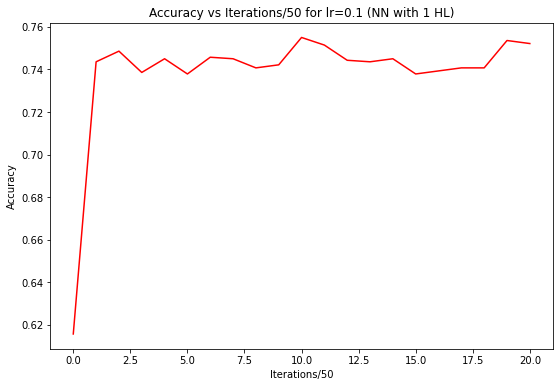

In [75]:
plt.figure(figsize=(9, 6))
plt.plot(accs1, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.1 (NN with 1 HL)")
plt.show()

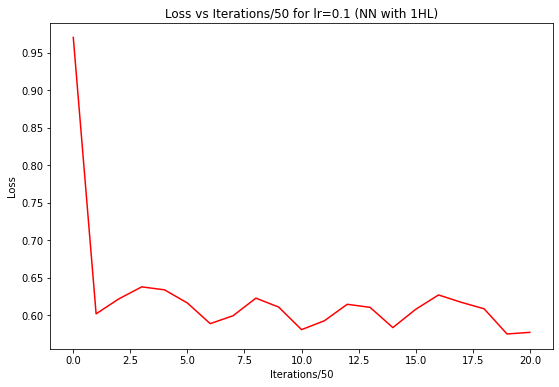

In [76]:
plt.figure(figsize=(9, 6))
plt.plot(losses1, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Loss")
plt.title("Loss vs Iterations/50 for lr=0.1 (NN with 1HL)")
plt.show()

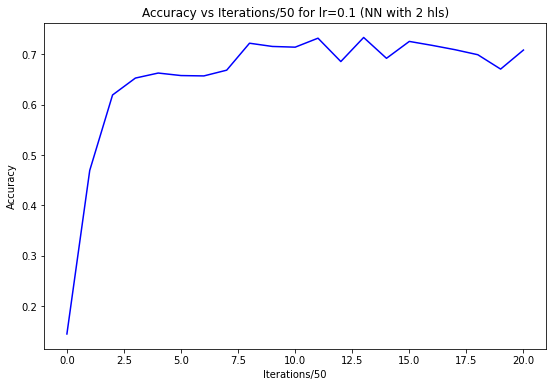

In [77]:
plt.figure(figsize=(9, 6))
plt.plot(accs2, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.1 (NN with 2 hls)")
plt.show()

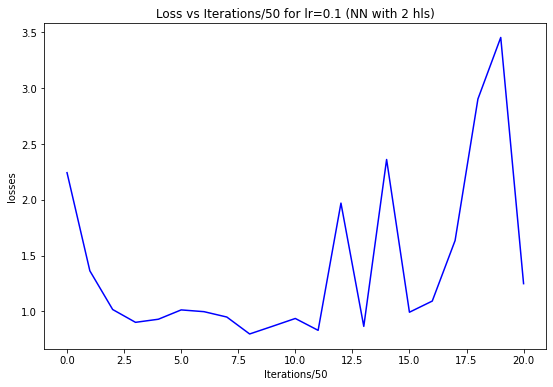

In [78]:
plt.figure(figsize=(9, 6))
plt.plot(losses2, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("losses")
plt.title("Loss vs Iterations/50 for lr=0.1 (NN with 2 hls)")
plt.show()

In [79]:
W1, b1, W2, b2, accs105, losses105 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy after epoch 0  =  0.21214285714285713
Cost after epoch 0  =  2.2062039322927745
Accuracy after epoch 50  =  0.585
Cost after epoch 50  =  1.3522716786486086
Accuracy after epoch 100  =  0.6992857142857143
Cost after epoch 100  =  1.015440714962972
Accuracy after epoch 150  =  0.7057142857142857
Cost after epoch 150  =  0.8554892194328709
Accuracy after epoch 200  =  0.7157142857142857
Cost after epoch 200  =  0.7777402956026553
Accuracy after epoch 250  =  0.7192857142857143
Cost after epoch 250  =  0.7359323636068552
Accuracy after epoch 300  =  0.7235714285714285
Cost after epoch 300  =  0.7099906289057222
Accuracy after epoch 350  =  0.7292857142857143
Cost after epoch 350  =  0.6921903309332191
Accuracy after epoch 400  =  0.7314285714285714
Cost after epoch 400  =  0.6785208281762602
Accuracy after epoch 450  =  0.7314285714285714
Cost after epoch 450  =  0.6676652028508726
Accuracy after epoch 500  =  0.73
Cost after epoch 500  =  0.6580750262968497
Accuracy after epoch 

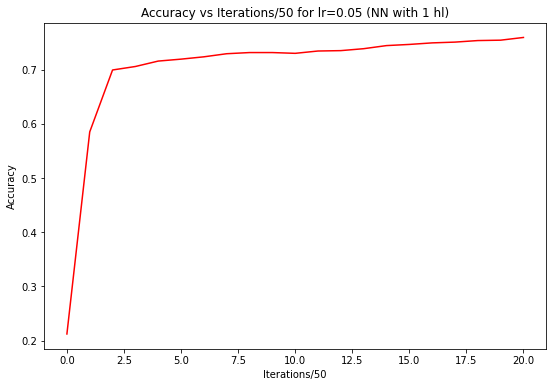

In [80]:
plt.figure(figsize=(9, 6))
plt.plot(accs105, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.05 (NN with 1 hl)")
plt.show()

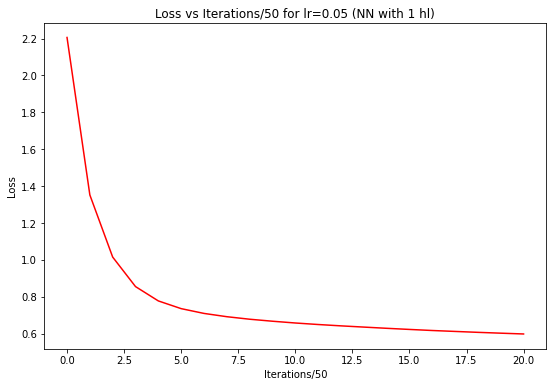

In [81]:
plt.figure(figsize=(9, 6))
plt.plot(losses105, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Loss")
plt.title("Loss vs Iterations/50 for lr=0.05 (NN with 1 hl)")
plt.show()

In [82]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs205, losses205 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy at epoch 0  =  0.18071428571428572
Loss at epoch  0  =  2.1413170330864038
Accuracy at epoch 50  =  0.6907142857142857
Loss at epoch  50  =  0.778036022330187
Accuracy at epoch 100  =  0.7185714285714285
Loss at epoch  100  =  0.7084495905617811
Accuracy at epoch 150  =  0.7207142857142858
Loss at epoch  150  =  0.6772540195463025
Accuracy at epoch 200  =  0.725
Loss at epoch  200  =  0.661076170777973
Accuracy at epoch 250  =  0.7314285714285714
Loss at epoch  250  =  0.6435607236106751
Accuracy at epoch 300  =  0.7371428571428571
Loss at epoch  300  =  0.6249442618496773
Accuracy at epoch 350  =  0.74
Loss at epoch  350  =  0.6065433654549935
Accuracy at epoch 400  =  0.7471428571428571
Loss at epoch  400  =  0.5919446125241876
Accuracy at epoch 450  =  0.7507142857142857
Loss at epoch  450  =  0.5816256816346739
Accuracy at epoch 500  =  0.7542857142857143
Loss at epoch  500  =  0.5759897101559631
Accuracy at epoch 550  =  0.7635714285714286
Loss at epoch  550  =  0.5614558

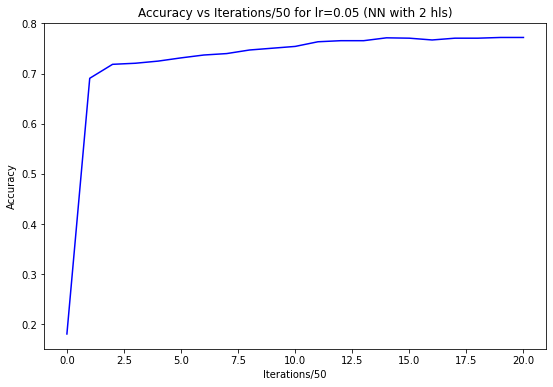

In [83]:
plt.figure(figsize=(9, 6))
plt.plot(accs205, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.05 (NN with 2 hls)")
plt.show()

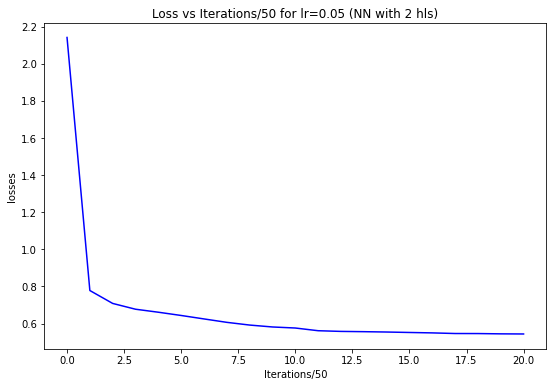

In [84]:
plt.figure(figsize=(9, 6))
plt.plot(losses205, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("losses")
plt.title("Loss vs Iterations/50 for lr=0.05 (NN with 2 hls)")
plt.show()

In [85]:
W1, b1, W2, b2, accs102, losses102 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.2, 100)

Accuracy after epoch 0  =  0.21071428571428572
Cost after epoch 0  =  2.1353806544721694
Accuracy after epoch 50  =  0.7092857142857143
Cost after epoch 50  =  0.7282124779546076
Accuracy after epoch 100  =  0.7392857142857143
Cost after epoch 100  =  0.6511906666511625
Accuracy after epoch 150  =  0.7457142857142857
Cost after epoch 150  =  0.6199694947228579
Accuracy after epoch 200  =  0.7535714285714286
Cost after epoch 200  =  0.602701939435541
Accuracy after epoch 250  =  0.7571428571428571
Cost after epoch 250  =  0.5863263927102228
Accuracy after epoch 300  =  0.7564285714285715
Cost after epoch 300  =  0.5730556781364425
Accuracy after epoch 350  =  0.7621428571428571
Cost after epoch 350  =  0.5782978952685133
Accuracy after epoch 400  =  0.7657142857142857
Cost after epoch 400  =  0.5590685101961428
Accuracy after epoch 450  =  0.7635714285714286
Cost after epoch 450  =  0.556718756882351
Accuracy after epoch 500  =  0.7685714285714286
Cost after epoch 500  =  0.552073759269

In [86]:
W1, b1, W2, b2, W3, b3, accs202, losses202 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.2, 100)

Accuracy at epoch 0  =  0.16142857142857142
Loss at epoch  0  =  2.289427628481207
Accuracy at epoch 50  =  0.5885714285714285
Loss at epoch  50  =  1.6960003483047867
Accuracy at epoch 100  =  0.7014285714285714
Loss at epoch  100  =  1.8856525585423762
Accuracy at epoch 150  =  0.7007142857142857
Loss at epoch  150  =  0.9033067942814321
Accuracy at epoch 200  =  0.7164285714285714
Loss at epoch  200  =  0.7989899981193255
Accuracy at epoch 250  =  0.7042857142857143
Loss at epoch  250  =  1.1274407364244892
Accuracy at epoch 300  =  0.6821428571428572
Loss at epoch  300  =  1.597233653777098
Accuracy at epoch 350  =  0.7028571428571428
Loss at epoch  350  =  1.5020054252119328
Accuracy at epoch 400  =  0.7614285714285715
Loss at epoch  400  =  0.7503921883941038
Accuracy at epoch 450  =  0.725
Loss at epoch  450  =  1.058312642676981
Accuracy at epoch 500  =  0.7342857142857143
Loss at epoch  500  =  0.7636791065786012
Accuracy at epoch 550  =  0.7185714285714285
Loss at epoch  550 

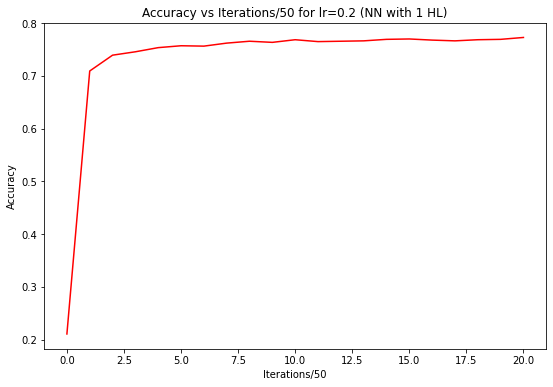

In [87]:
plt.figure(figsize=(9, 6))
plt.plot(accs102, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.2 (NN with 1 HL)")
plt.show()

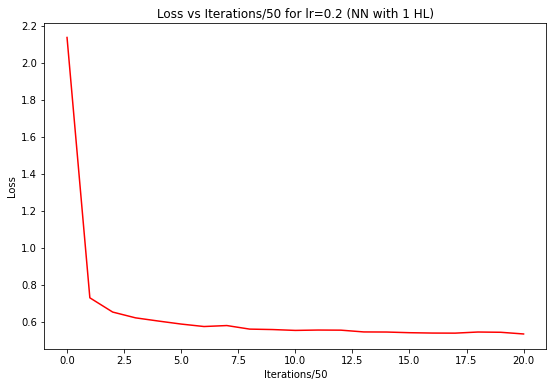

In [88]:
plt.figure(figsize=(9, 6))
plt.plot(losses102, color="red")

plt.xlabel("Iterations/50")
plt.ylabel("Loss")
plt.title("Loss vs Iterations/50 for lr=0.2 (NN with 1 HL)")
plt.show()

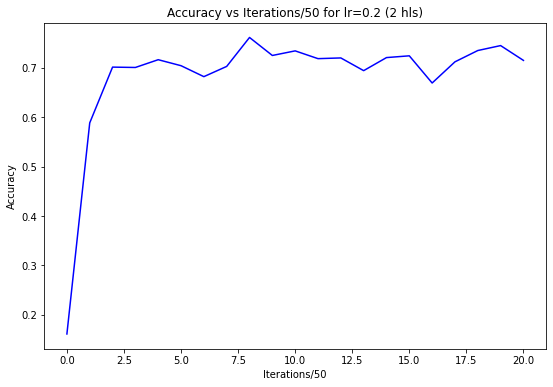

In [89]:
plt.figure(figsize=(9, 6))
plt.plot(accs202, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations/50 for lr=0.2 (2 hls)")
plt.show()

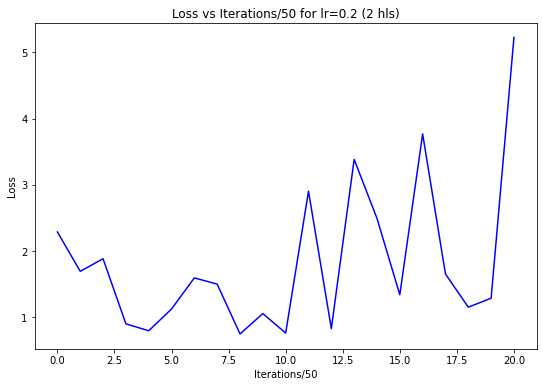

In [90]:
plt.figure(figsize=(9, 6))
plt.plot(losses202, color="blue")

plt.xlabel("Iterations/50")
plt.ylabel("Loss")
plt.title("Loss vs Iterations/50 for lr=0.2 (2 hls)")
plt.show()